<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2020

Agenda:
<ul>
    <li>kNN</li>
    <li>Naive Bayes</li>
</ul>

<hr>

# 1. k-NN

### Implementemos k-NN utilizando Numpy.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def euclidean_dist(x_i, x_j):
    """
    Implements a euclidean distance between two arrays.
    Arrays must be two-dimensional

    Arguments:
    x_i -- array i
    x_j -- array j (can be a matrix)

    Returns:
    euclidean distance
    """
    return np.sqrt(np.sum((x_i - x_j)**2, axis=1))

In [3]:
# 1. Dataset de personas visto en la sesion magistral
X = np.array([[6, 180, 12], 
              [5.92,190,11],
              [5.58,170,12],
              [5.92,165,10],
              [5,100,6],
              [5.5,150,8],
              [5.42,130,7],
              [5.75,150,9]])

#0:hombre 1:mujer
Y = np.array([0,0,0,0,1,1,1,1])

In [4]:
# 2. calculemos las distancias desde el nuevo dato x con respecto a todo el dataset X

x = np.array([[5.8, 157, 7]])

d = euclidean_dist(x, X)

print("distancias: ", d)

distancias:  [23.5380543  33.24175687 13.93012563  8.5448464  57.01438415  7.07742891
 27.00267394  7.28028159]


In [5]:
# 3. ordenamos las distancias y obtenemos las clases segun los indices ordenados

ind_ord = np.argsort(d)
print(ind_ord)
Y_ord = Y[ind_ord]
print(Y_ord)

[5 7 3 2 0 6 1 4]
[1 1 0 0 0 1 0 1]


In [6]:
# 4. definamos k y seleccionemos los primeros k elementos y determinemos la categoria de x

k = 3
first_k = Y_ord[:k]

more_frequent_class = np.bincount(first_k).argmax()

clase = "mujer" if more_frequent_class==1 else "hombre"

print("El objeto ",x," pertenece a la clase: ",clase)

El objeto  [[  5.8 157.    7. ]]  pertenece a la clase:  mujer


<hr>

### Ahora implementemos el ejemplo anterior utilizando la libreria sklearn.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from time import time


# 1. Entrenamos el modelo con los datos
k=3
model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
# 2. utilicemos el modelo entrenado para lanzar una prediccion
x = np.array([[5.8, 157, 7]])
pred = model.predict(x)

clase = "mujer" if pred==1 else "hombre"

print("El objeto ",x," pertenece a la clase: ",clase)

El objeto  [[  5.8 157.    7. ]]  pertenece a la clase:  mujer


<hr>

## Trabajemos

Ploteemos la superficie de decision de este modelo para tener una idea espacial de su comportamiento, probando distintos valores de k.

In [9]:
'''
    Utility functions
'''

import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_data(data_type):
    """
    Generate a binary dataset with distribution data_type

    Arguments:
    data_type -- distribution of dataset {moons,circles,blobs}

    Returns:
    X -- features
    Y -- labels
    """ 
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(200, noise=0.20)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(200, noise=0.20)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, random_state=0)
    return X, Y

def visualize(X, y, model):
    plot_decision_boundary(lambda x:model.predict(x), X, y)

def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [10]:
X, Y = generate_data('blobs')

X

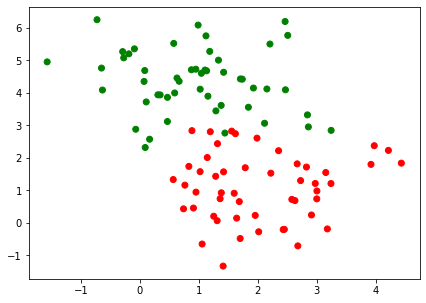

In [11]:
color= ['red' if y == 1 else 'green' for y in Y]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from time import time


# 1. Entrenamos el modelo con los datos
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
visualize(X, Y, neigh)

<hr>

# Naive Bayes

### Trabajemos: 

Utilizando los conceptos vistos en sesion magistral, implementar Naive Bayes utilizando numpy.

<hr>

### Naive Bayes utilizando sklearn

In [ ]:
# 1. Dataset de personas visto en la sesion magistral
X = np.array([[6, 180, 12], 
              [5.92,190,11],
              [5.58,170,12],
              [5.92,165,10],
              [5,100,6],
              [5.5,150,8],
              [5.42,130,7],
              [5.75,150,9]])

#0:hombre 1:mujer
Y = np.array([0,0,0,0,1,1,1,1])

In [ ]:
from sklearn.naive_bayes import GaussianNB

# 1. Entrenamos el modelo con los datos
model = GaussianNB()
model.fit(X, Y)

In [ ]:
# 2. utilicemos el modelo entrenado para lanzar una prediccion
x = np.array([[5.8, 157, 7]])
pred = model.predict(x)

clase = "mujer" if pred==1 else "hombre"

print("El objeto ",x," pertenece a la clase: ",clase)

<hr>

## Analicemos

Ploteemos la superficie de decision de este modelo para tener una idea espacial de su comportamiento.

In [ ]:
X, Y = generate_data('blobs')

In [ ]:
color= ['red' if y == 1 else 'green' for y in Y]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

In [ ]:
# 1. Entrenamos el modelo con los datos
model = GaussianNB()
model.fit(X, Y)

visualize(X, Y, model)